<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/paper/transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook describes how to run experiments to test different transformations on various features in input and
output data. The AI4Water packae needs to be installed properly.

In [1]:
!python -m pip install git+https://github.com/AtrCheema/AI4Water.git

  Cloning https://github.com/AtrCheema/AI4Water.git (to revision dev) to /tmp/pip-req-build-lp8qk3pc
  Running command git clone -q https://github.com/AtrCheema/AI4Water.git /tmp/pip-req-build-lp8qk3pc
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Created wheel for AI4Water: filename=AI4Water-1.0-cp37-none-any.whl size=352791 sha256=e3d995f1a5abe0502d523dcc9bcf6a49d2e20cad3349a7d8a07e6c7332d47c47
  Stored in directory: /tmp/pip-ephem-wheel-cache-d023n2hb/wheels/12/e9/b4/a58b20a0b3e80c4aaf910662423ce1a0f11b19c0732ac727e7
Successfully built AI4Water


In [1]:
import matplotlib.pyplot as plt

from ai4water.experiments import TransformationExperiments
from ai4water.datasets import arg_beach

C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
C:\Users\USER\Anaconda3\envs\tfgpu21_py37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)



**********Pytorch models could not be imported **********



In [2]:
data = arg_beach()

data.head()

,tide_cm,wat_temp_c,sal_psu,air_temp_c,pcp_mm,pcp3_mm,pcp6_mm,pcp12_mm,wind_dir_deg,wind_speed_mps,air_p_hpa,mslp_hpa,rel_hum,tetx_coppml
index,,,,,,,,,,,,,,
2018-06-19 00:00:00,36.407149,19.321232,33.956059,19.780000,0.0,0.0,0.0,0.0,159.533333,0.960000,1002.856667,1007.256667,95.000000,NaN
2018-06-19 00:30:00,35.562515,19.320124,33.950508,19.093333,0.0,0.0,0.0,0.0,86.596667,0.163333,1002.300000,1006.700000,95.000000,NaN
2018-06-19 01:00:00,34.808016,19.319666,33.942532,18.733333,0.0,0.0,0.0,0.0,2.260000,0.080000,1001.973333,1006.373333,95.000000,NaN
2018-06-19 01:30:00,30.645216,19.320406,33.931263,18.760000,0.0,0.0,0.0,0.0,62.710000,0.193333,1001.776667,1006.120000,95.006667,NaN
2018-06-19 02:00:00,26.608980,19.326729,33.917961,18.633333,0.0,0.0,0.0,0.0,63.446667,0.510000,1001.743333,1006.103333,95.006667,NaN


In [3]:
inputs = list(data.columns)[0:-1]
inputs

['tide_cm',
 'wat_temp_c',
 'sal_psu',
 'air_temp_c',
 'pcp_mm',
 'pcp3_mm',
 'pcp6_mm',
 'pcp12_mm',
 'wind_dir_deg',
 'wind_speed_mps',
 'air_p_hpa',
 'mslp_hpa',
 'rel_hum']

In [4]:
outputs = [list(data.columns)[-1]]
outputs

['tetx_coppml']

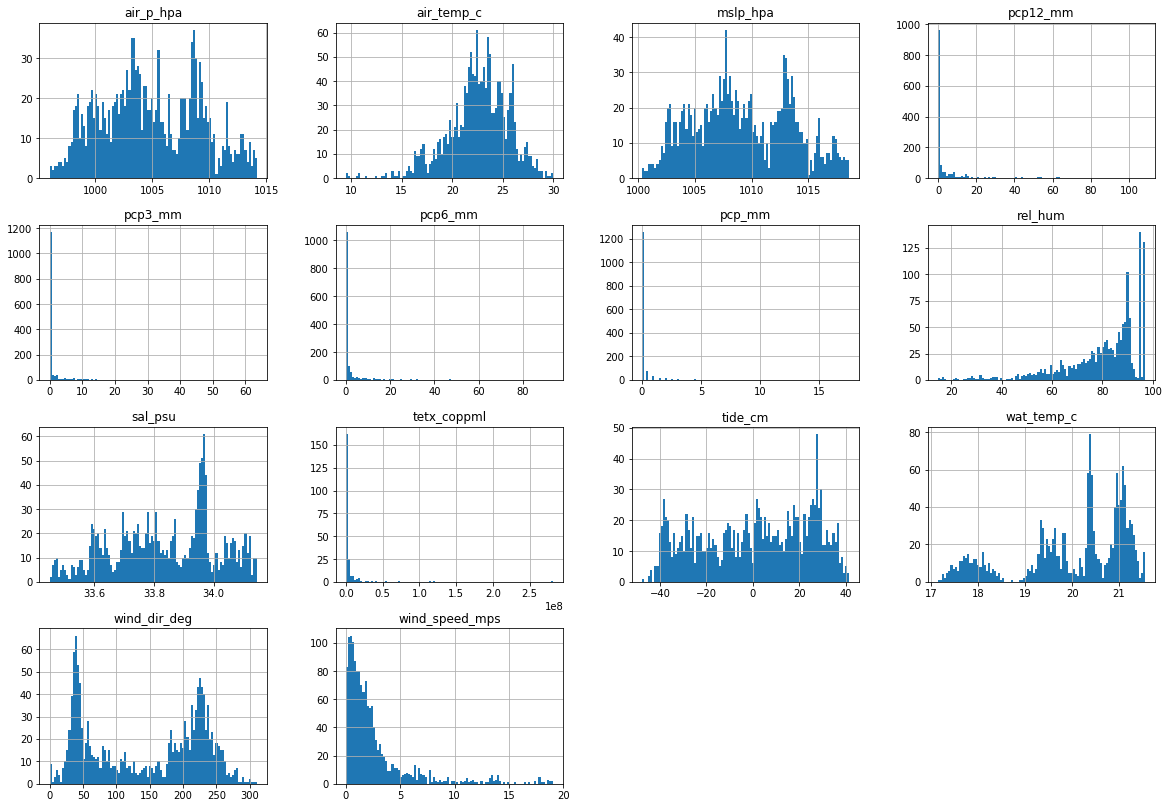

In [5]:
_ = data[inputs+outputs].hist(bins=100, figsize=(20, 14))
plt.show()

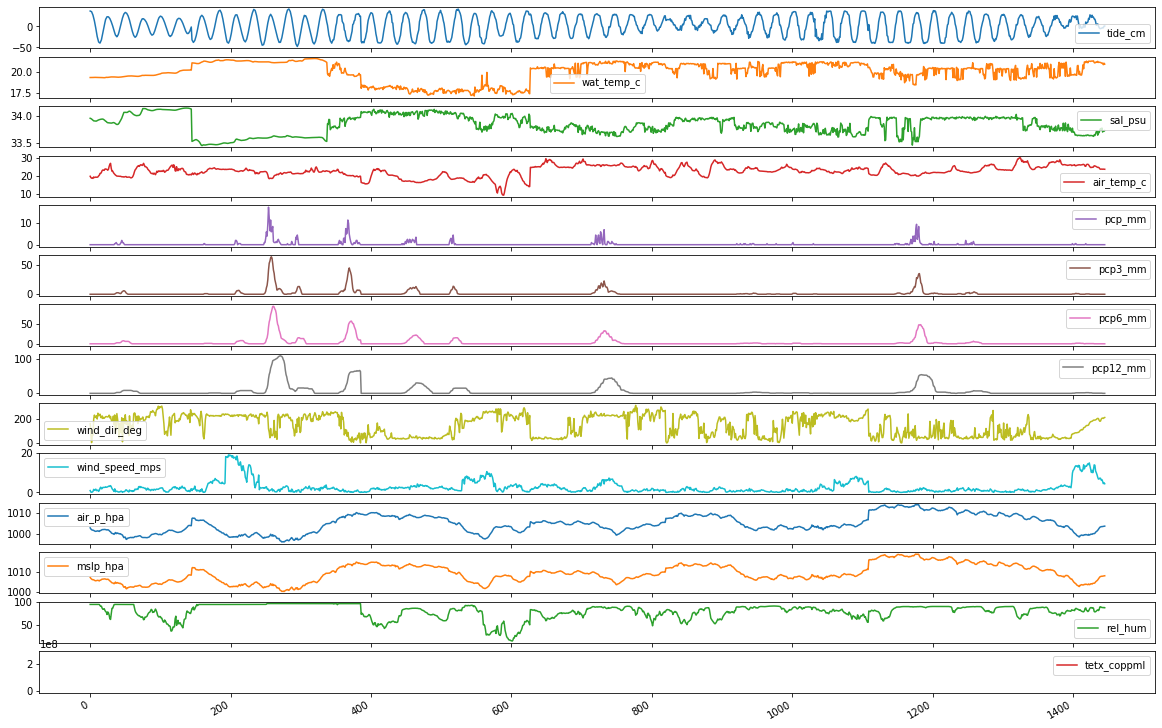

In [6]:
_ = data[inputs+outputs].plot(sharex=True, subplots=True, use_index=False, figsize=(20, 14))
plt.show()

In [7]:
neg_inputs = ['tide_cm']
pos_inputs = [inp for inp in inputs if inp != 'tide_cm']
norm_inputs = ['tide_cm', 'wat_temp_c', 'sal_psu', 'air_temp_c', 'wind_dir_deg', 'wind_speed_mps', 'air_p_hpa', 'mslp_hpa', 'rel_hum']
sk_inputs = [ 'pcp_mm', 'pcp3_mm', 'pcp6_mm', 'pcp12_mm']

We can define different cases for our experiemtn. Each case/model differs from the other case in the application of 
transformation. In first few cases we apply one transformation to both input and output data, next we apply separate
transformations to input and output data. Sine some of input data is very skewed, we try to apply a different
transformation on these input data types.

In [8]:
cases = {
    'model_minmax': {'x_transformation': 'minmax'},
    'model_zscore': {'x_transformation': 'zscore'},
    'robust': {'x_transformation': 'robust'},
    'quantile': {'x_transformation': 'quantile'},
    'power': {'x_transformation': 'power'},
    'log': {'x_transformation': [{"method": "log",  "replace_zeros": True,
                                  "features": pos_inputs},
                               {"method": "zscore", "features": neg_inputs},
                              {"method": "log", "replace_nans": True, "replace_zeros": True,
                               "features": outputs}]},
    'zscore_robust': {'x_transformation': [{"method": 'zscore', "features": inputs},  {"method": "robust", "features": outputs}]},
    'zscore_log': {'x_transformation': [{"method": "zscore", "features": inputs}, {"method": "log", "features": outputs}]},
    'minmax_log': {'x_transformation': [{"method": "minmax", "features": inputs},  {"method": "log", "features": outputs}]},
    'no_log': {'x_transformation': [{"method": None, "features": inputs},  {"method": "log", "features": outputs}]},
    'no_zscore': {'x_transformation': [{"method": None, "features": inputs}, {"method": "zscore", "features": outputs}]},
    'no_robust': {'x_transformation': [{"method": None, "features": inputs},  {"method": "robust", "features": outputs}]},
    'no_power': {'x_transformation': [{"method": None, "features": inputs}, {"method": "power", "features": outputs}]},
    'no_quantile': {'x_transformation': [{"method": None, "features": inputs}, {"method": "quantile", "features": outputs}]},
    'minmax_quantile': {'x_transformation': [{"method": 'minmax', "features": inputs}, {"method": "quantile", "features": outputs}]},
    'minmax_zscore': {'x_transformation': [{"method": 'minmax', "features": inputs},  {"method": "zscore", "features": outputs}]},

    'quantile_log': {'x_transformation': [{"method": 'quantile', "features": inputs},  {"method": "log", "features": outputs}]},

    'minmax_robust_robust': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                                   {'method': 'robust', 'features': sk_inputs},
                                   {'method': 'robust', 'features': outputs}]},
    'minmax_quantile_robust': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                           {'method': 'quantile', 'features': sk_inputs},
                           {'method': 'robust', 'features': outputs}]},
    'minmax_quantile_quantile': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                           {'method': 'quantile', 'features': sk_inputs},
                           {'method': 'quantile', 'features': outputs}]},
    'minmax_quantile_log': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                           {'method': 'quantile', 'features': sk_inputs},
                           {'method': 'log', 'features': outputs}]},
    'minmax_log_log': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                           {'method': 'log',  "replace_zeros": True, 'features': sk_inputs},
                           {'method': 'log',  "replace_zeros": True,  'features': outputs}]},
    'zscore_robust_log': {'x_transformation': [{'method': 'zscore', 'features': norm_inputs},
                                   {'method': 'robust', 'features': sk_inputs},
                                   {'method': 'log', 'replace_zeros': True, "replace_nans": True, 'features': outputs}]},
    'minmax_robust_log': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                                   {'method': 'robust', 'features': sk_inputs},
                                   {'method': 'log', 'replace_zeros': True, 'features': outputs}]},
    'minmax_power_log': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                                   {'method': 'power', 'features': sk_inputs},
                                   {'method': 'log', 'features': outputs}]},
    'minmax_power_robust': {'x_transformation': [{'method': 'minmax', 'features': norm_inputs},
                                   {'method': 'power', 'features': sk_inputs},
                                   {'method': 'robust',  'features': outputs}]},
    'minmax_logminmax': {'x_transformation': [{'method': 'minmax', 'features': inputs},
                               {'method': 'log','features': outputs},
                               {'method': 'minmax', 'features': outputs}]},
    'minmax_logrobust': {'x_transformation': [{'method': 'minmax', 'features': inputs},
                               {'method': 'log', 'replace_zeros': True, 'features': outputs},
                               {'method': 'robust',  'features': outputs}]},
    'robust_logrobust': {'x_transformation': [{'method': 'robust', 'features': inputs},
                               {'method': 'log', 'replace_zeros': True, 'features': outputs},
                               {'method': 'robust', 'features': outputs}]}
}

In [9]:
model_args = {
    'input_features' : inputs,
    'output_features': outputs,
    'epochs': 2000,
    'train_data': 'random',
    'patience': 50,
    'verbosity': 0,
} 

In [10]:
class MyTransformationExperiment(TransformationExperiments):

    def update_paras(self, **suggested_paras):
        """This method must update all the parameters to build the dl4sq 'Model'."""
        return {
            'model': {
                'layers': {
                    "LSTM": {"config": {"units": 64}, "dropout": 0.2},
                    "Dense": {"config": {"units": 1, "activation": "relu"}},
                    "Reshape": {"config": {"target_shape": (1,1)}}
                }
            },
            'lookback': suggested_paras.get('lookback', 10),
            'batch_size': suggested_paras.get('batch_size', 16),
            'lr': suggested_paras.get('lr', 0.0001),
            'x_transformation': suggested_paras['x_transformation']
        }

In [11]:
experiment = MyTransformationExperiment(data=data, cases=cases, **model_args)

running  model_minmax model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_zscore model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_robust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_quantile model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_power model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_zscore_robust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_zscore_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_no_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_no_zscore model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_no_robust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_no_power model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_no_quantile model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_quantile model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_zscore model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_quantile_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_robust_robust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_quantile_robust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_quantile_quantile model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_quantile_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_log_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_zscore_robust_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_robust_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_power_log model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_power_robust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_logminmax model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_minmax_logrobust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********

running  model_robust_logrobust model


d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)
d:\mytools\ai4water\AI4Water\main.py:531: UserWarning: lookback is 10, due to which first 10 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.
  UserWarning)



********** Allowing NANs in predictions **********



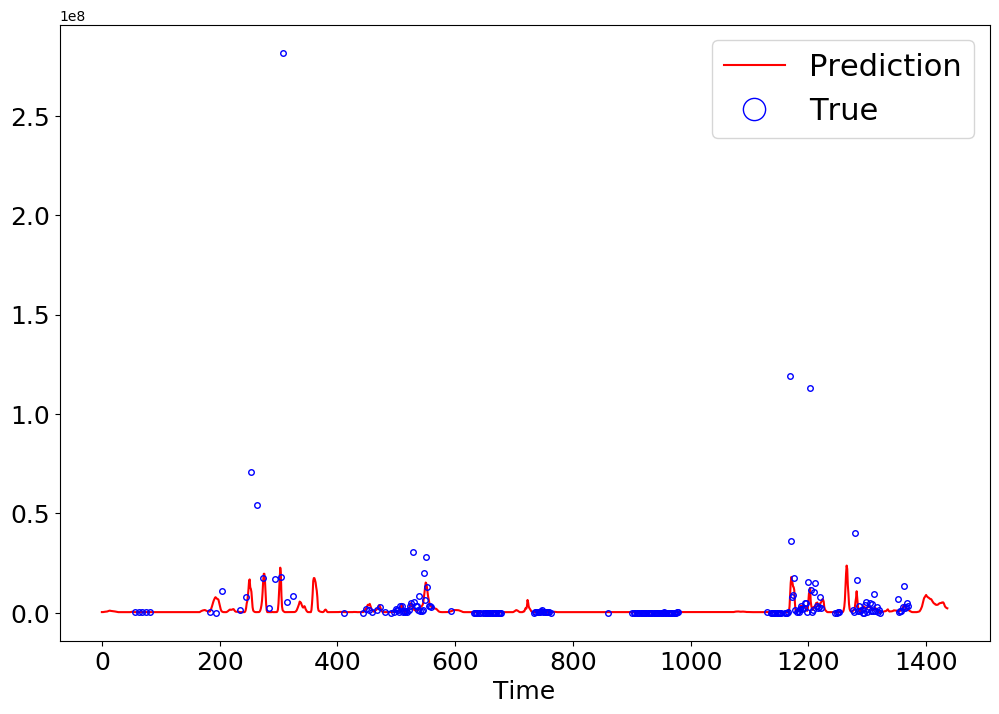

In [12]:
experiment.fit()

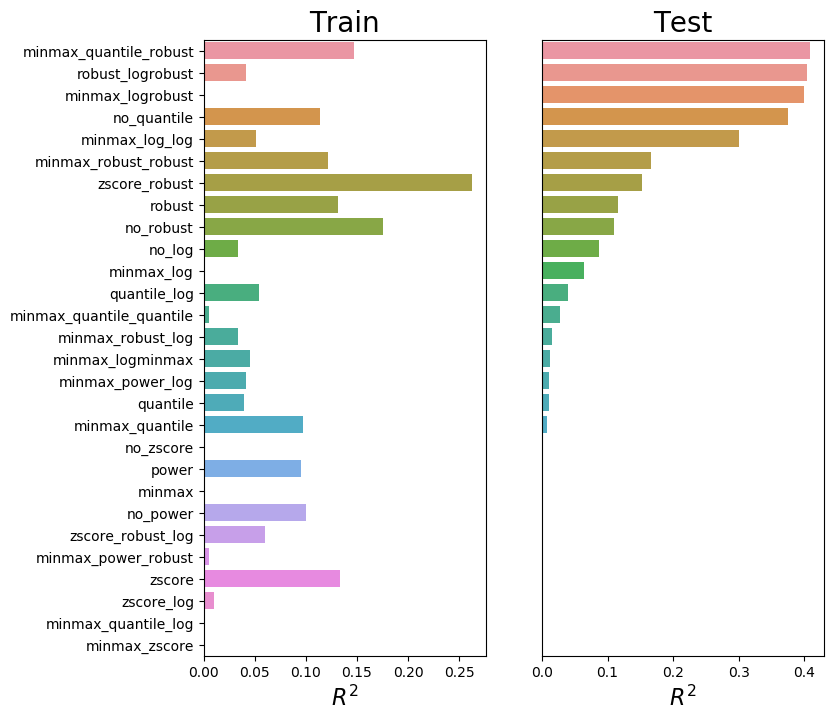

In [13]:
errs = experiment.compare_errors('r2', save=False)

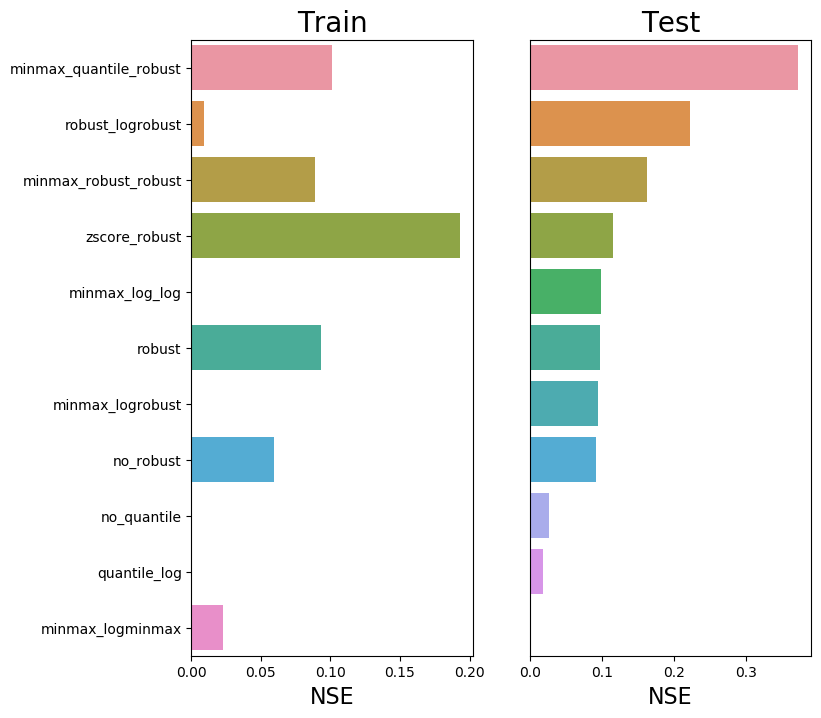

In [14]:
errs = experiment.compare_errors('nse', save=False)

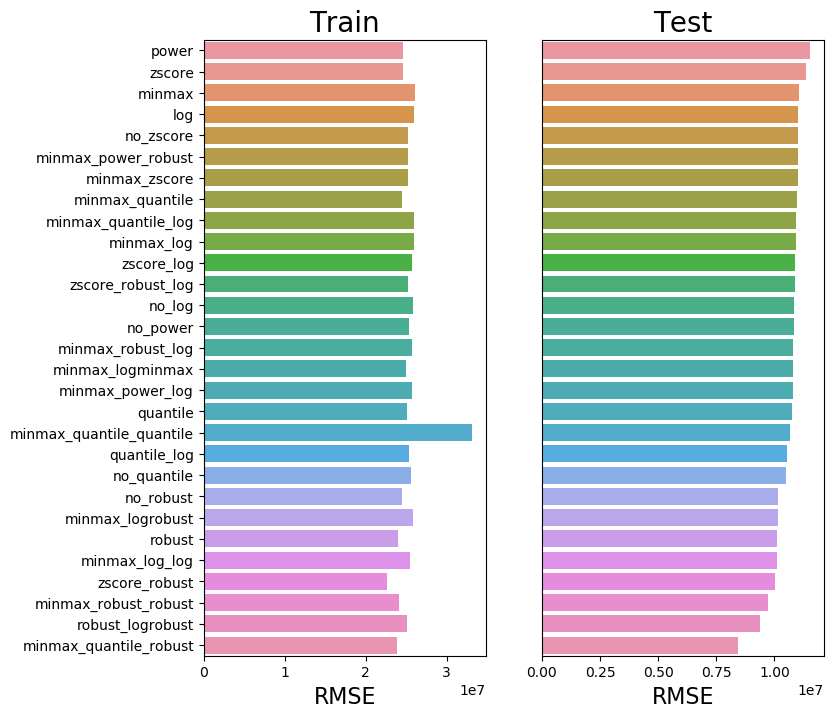

In [15]:
errs = experiment.compare_errors('rmse', save=False)

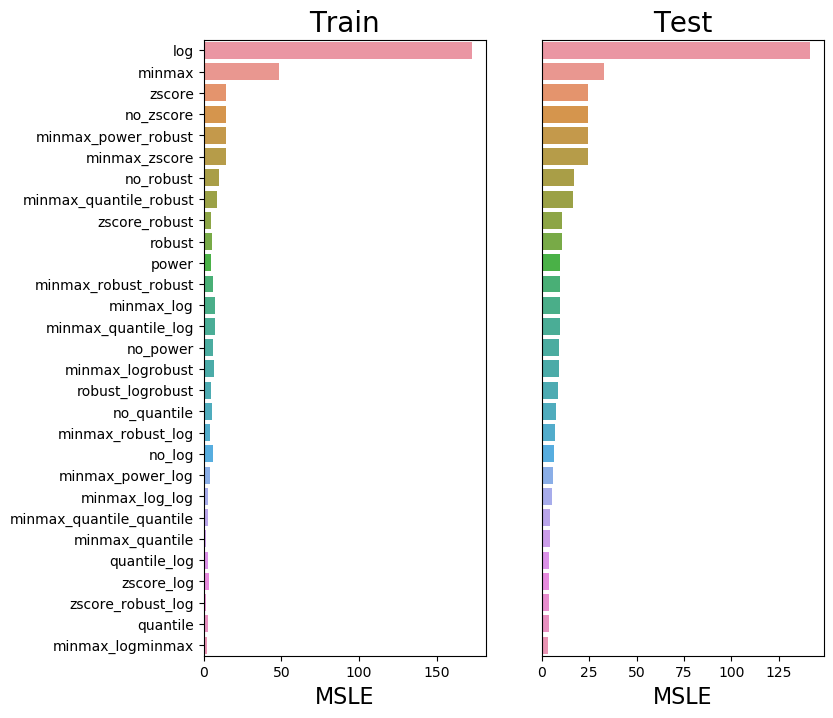

In [16]:
errs = experiment.compare_errors('msle', save=False)

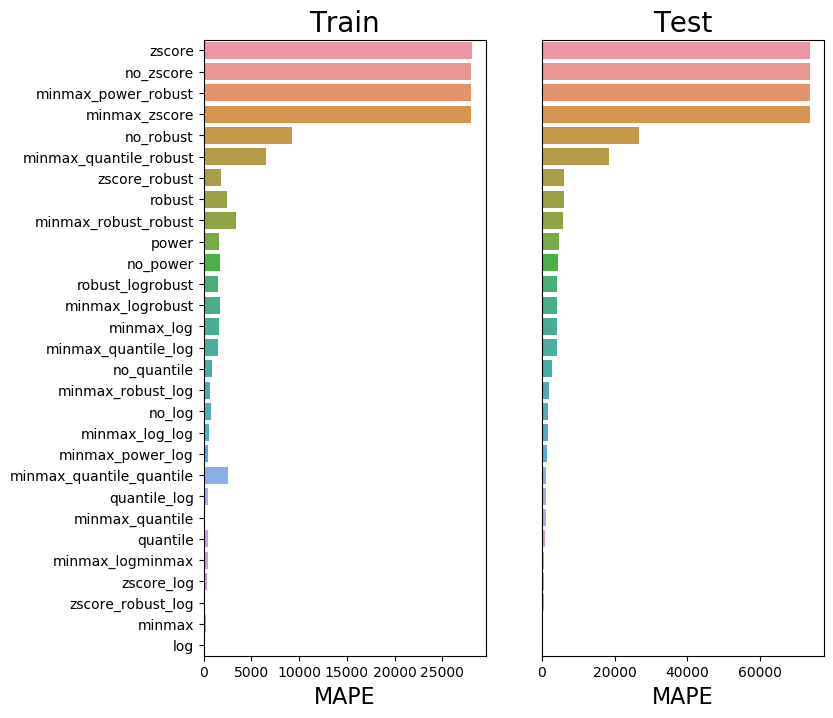

In [17]:
errs = experiment.compare_errors('mape', save=False)

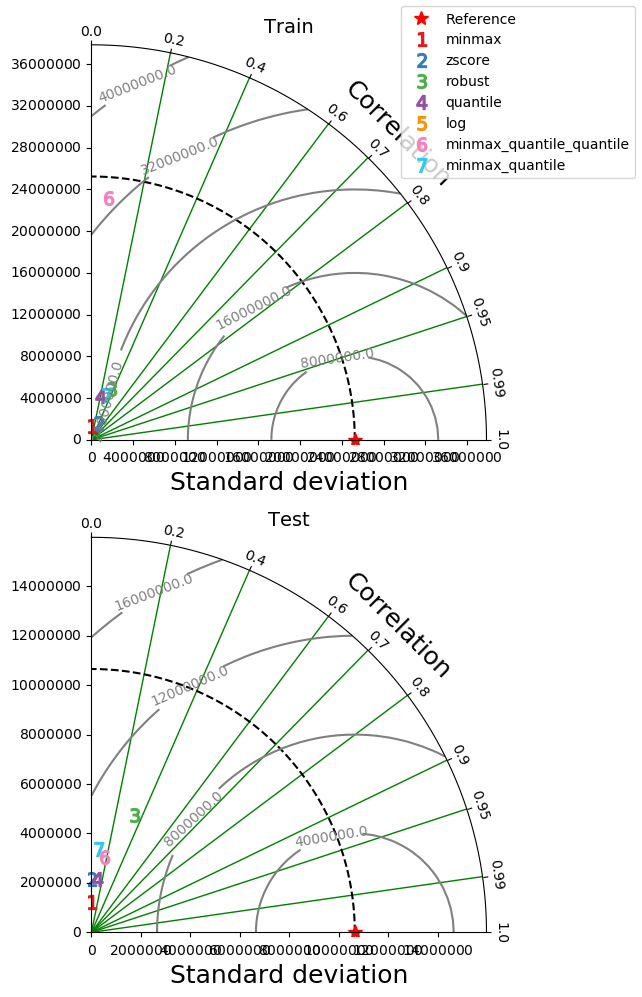

In [18]:
experiment.taylor_plot(
             include=['minmax', 'zscore', 'robust', 'quantile', 'log',
                      'minmax_quantile_quantile', 'minmax_quantile'],
             figsize=(7, 14),
             save=True,
             grid_kws={'axis': 'x', 'color': 'g', 'lw': 1.0},
            )

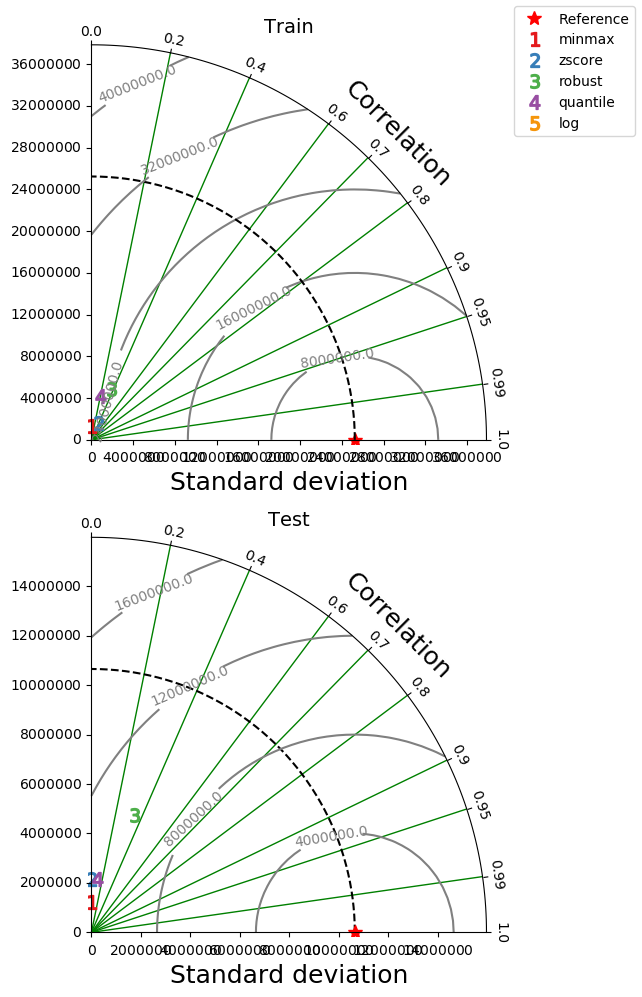

In [19]:
experiment.taylor_plot(
             include=['minmax', 'zscore', 'robust', 'quantile', 'log'],
             figsize=(7, 14),
             save=True,
             grid_kws={'axis': 'x', 'color': 'g', 'lw': 1.0},
            )